# Multiclass Classification with a Deep Network

Take the example of the `iris` dataset, which is a multiclass classification problem.

Train a few deep networks with different architectures and compare their performance. Use `ReLU` activation function for hidden layers and `softmax` for the output layer.

- The first network is a simple feedforward neural network with one hidden layer with 5 neurons.
- The second network is a deep neural network with 2 hidden layers with 2 neurons each.

- Retrain the first network with a Tanh activation function for the hidden layer and compare the performance.


Before we turn to the mathematical formulation of the model, let's explore its capabilities.

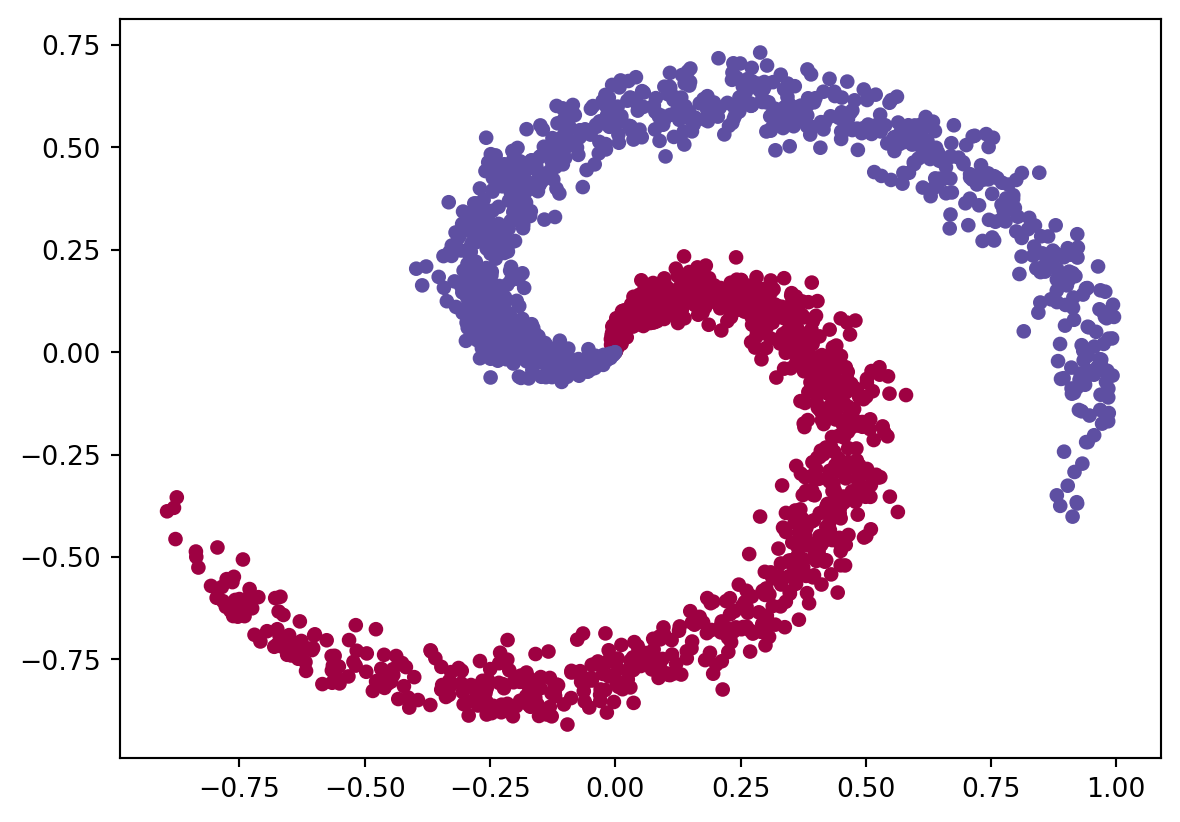

In [1]:
# Create a XOR dataset

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Number of samples per class
N = 1000
D = 2
K = 2

X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

# Plot the data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
plt.show()


In [2]:
# A linear model will not be able to separate the classes

# Train a linear classifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
print('Accuracy: %.2f' % model.score(X, y))


Accuracy: 0.71


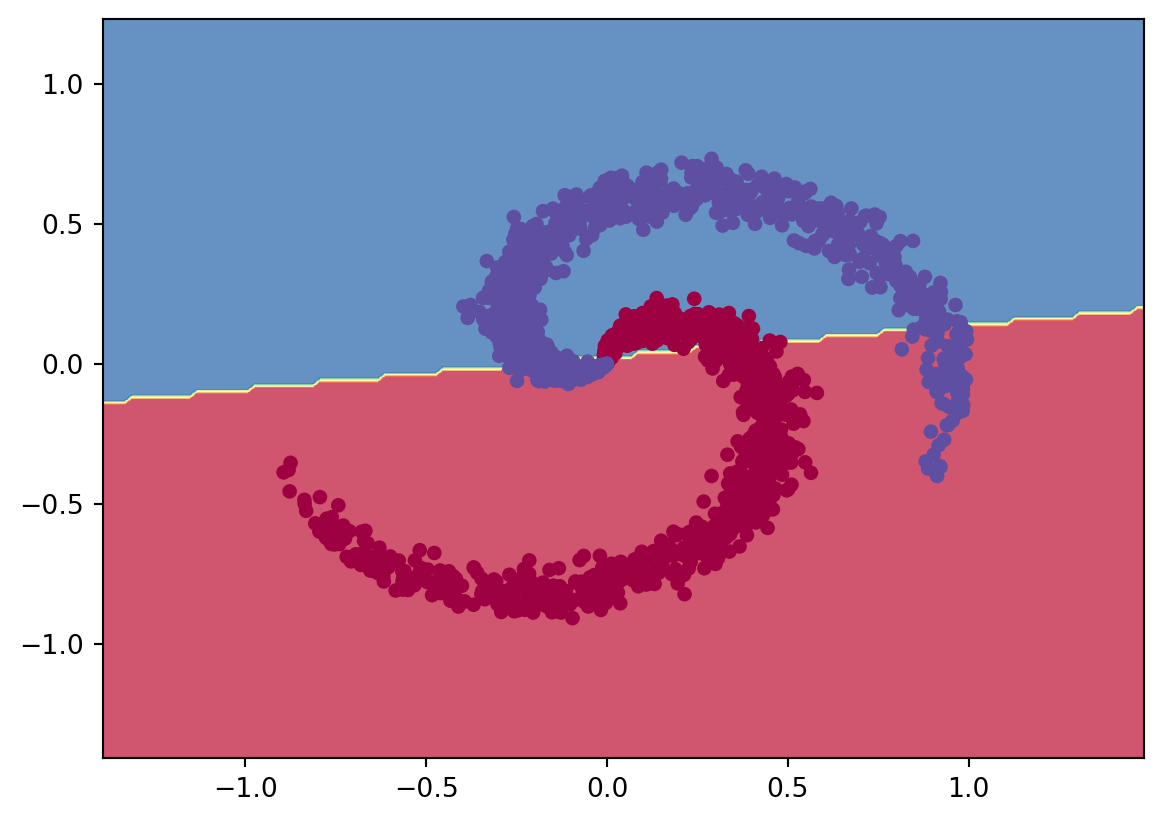

In [3]:
# Plot the predictions of the model

def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)

plt.figure()
plot_decision_boundary(model, X, y)
plt.show()

In [4]:
# Train a neural network using pytorch

import torch
import torch.nn as nn
import torch.optim as optim


# Convert the data to pytorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

# Define the model
model = nn.Sequential(
    nn.Linear(D, 5),
    nn.ReLU(),
    nn.Linear(5, K)
)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model

for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print('Epoch %d, Loss: %.4f' % (epoch, loss.item()))

# Evaluate the model
y_pred = model(X_tensor).argmax(1)
accuracy = (y_pred == y_tensor).float().mean()
print('Accuracy: %.2f' % accuracy.item())

Epoch 0, Loss: 0.8014
Epoch 50, Loss: 0.4619
Epoch 100, Loss: 0.4010
Epoch 150, Loss: 0.3432
Epoch 200, Loss: 0.2928
Epoch 250, Loss: 0.2512
Epoch 300, Loss: 0.2201
Epoch 350, Loss: 0.2027


Epoch 400, Loss: 0.1930
Epoch 450, Loss: 0.1874
Epoch 500, Loss: 0.1840
Epoch 550, Loss: 0.1817
Epoch 600, Loss: 0.1802
Epoch 650, Loss: 0.1791
Epoch 700, Loss: 0.1782


Epoch 750, Loss: 0.1776
Epoch 800, Loss: 0.1771
Epoch 850, Loss: 0.1767
Epoch 900, Loss: 0.1763
Epoch 950, Loss: 0.1760


Accuracy: 0.92


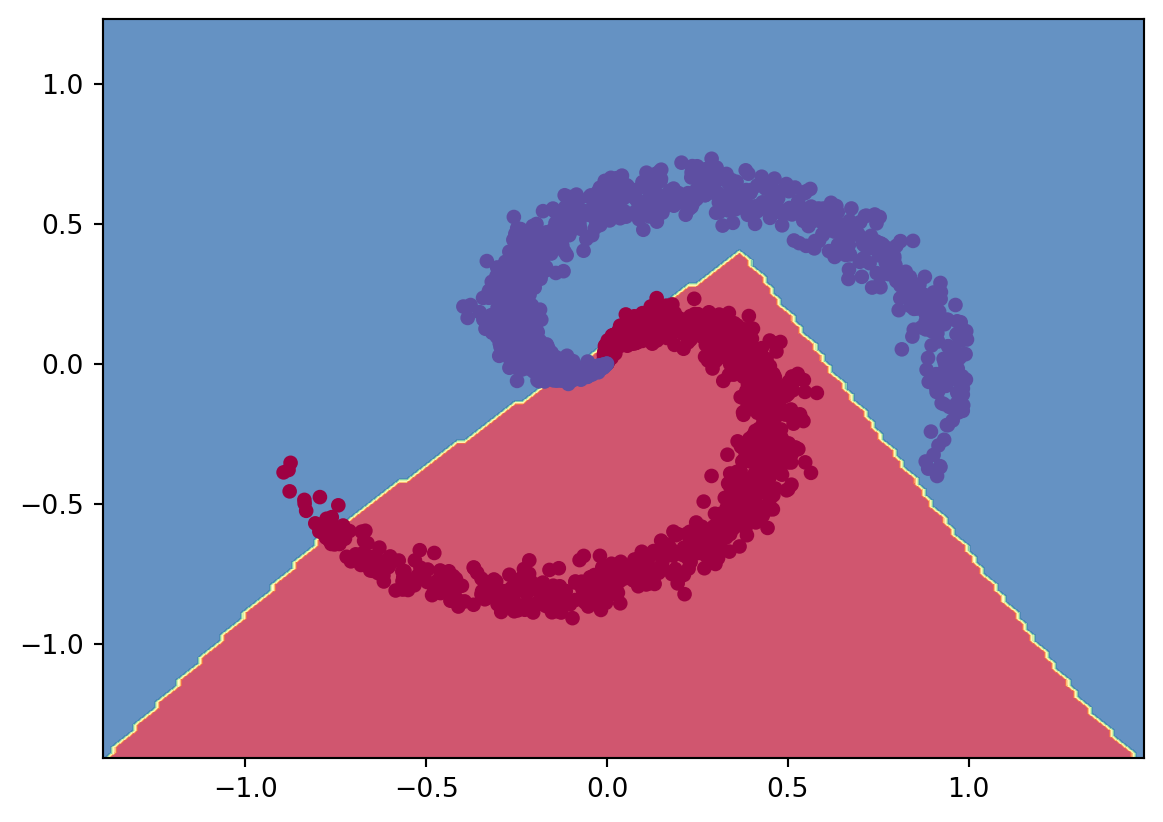

In [5]:
# Plot the decision boundary

def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    Z = model(X_test).argmax(1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)

plt.figure()
plot_decision_boundary(model, X, y)
plt.show()

The mathematical representation of the model is:

$$
\begin{align*}
z_1 &= w_{11}x_1 + w_{21}x_2 + b_1 \\
z_2 &= w_{12}x_1 + w_{22}x_2 + b_2 \\
z_3 &= w_{13}x_1 + w_{23}x_2 + b_3 \\
o &= w^{h}_{1}\sigma(z_1) + w^{h}_{2}\sigma(z_2) + w^{h}_{3}\sigma(z_3) + b^{h} \\
\hat{y} &= \sigma(o)
\end{align*}
$$

where $\sigma$ is the sigmoid function and serves as the activation function for the hidden layer and the output layer.

The usual loss function for binary classification is the binary cross-entropy loss that we have already seen in the binary logistic regression model. For a single observation (sample), the loss function is:

$$
\begin{align*}
L(y, \hat{y}) &= -y\log(\hat{y}) - (1-y)\log(1-\hat{y})
\end{align*}
$$


If we are to train this network, we need to know how to update the weights and biases.

Again, we will use the gradient descent algorithm, so we need to compute the gradients of the loss function with respect to the weights and biases using the chain rule.

Unlike the binary logistic regression model, here we have two sets of weights and biases to update: the weights and biases of the hidden layer and the weights and biases of the output layer.

Let's deal with the output layer first.

The gradient of the loss function with respect to the weights is a vector of the same shape as the weights. For the first weight $w^{h}_{1}$, the gradient is:

$$
\begin{align*}
\frac{\partial L}{\partial w^{h}_{1}} &= \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial o} \frac{\partial o}{\partial w^{h}_{1}}
\end{align*}
$$

With the sigmoid function as the activation function, the derivative of the sigmoid function is:

$$
\begin{align*}
\frac{\partial \sigma(x)}{\partial x} &= \sigma(x)(1-\sigma(x))
\end{align*}
$$

The derivatives of the loss function with respect to the output layer are:

$$
\begin{align*}
\frac{\partial L}{\partial \hat{y}} &= -\frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} \\
\frac{\partial \hat{y}}{\partial o} &= \hat{y}(1-\hat{y})
\end{align*}
$$

